In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Parametric versus non-parametric tests



A parametric test is a test that uses some known set of parameter estimates (mean and standard deviation, for example) to represent the information in the data. When a variable has a mathematically-understood distribution (Gaussian/Normal, Binomial, Poisson, etc), it can be accurately summarized using a few parameters, so a parametric test makes sense. For example, a t-test is considered a parametric test as it assumes normality in samples and populations. 

For variables that don't conform to a distribution type, their information can't be summarized in just a few parameters, and representing them with these types of parameters will be misleading (like taking the mean of a very skewed distribution). For these, non-parametric tests are used. These tests rely on other estimates that represent certain pieces of information within a variable (like the median, which describes the middlemost datapoint when a variable is sorted by size), but not the whole variable. 

Because the estimates they use contain less information than parametric estimates, non-parametric tests are less able to detect very small effects than parametric tests, but they are also less vulnerable to bias from extreme observations in the data.



## Formally testing for normality with Shapiro-Wilk

Before getting into these more exotic tests, let's start with something we're good at; checking whether two samples are each normally distributed.

Let's practice on the famous [Iris flower](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. 


In [23]:
iris = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/iris.data",
                  names = ["sepal_length","sepal_width","petal_length","petal_width","species"])

iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For this analysis we will be comparing statistics of the three species of Iris flower, labeled `Iris-setosa`, `Iris-versicolor` and  `Iris-virginica`. 

We can get a record count for each group by chaining the `groupby()` and `agg()` methods:

In [24]:
iris.groupby(['species']).agg(['count'])

,sepal_length,sepal_width,petal_length,petal_width
,count,count,count,count
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


At only fifty observations per group, this is a pretty small sample -- about as small as we'd want to go with conducting inferential statistics.


## Testing for normality

Earlier we tested a distributions' normality by both plotting it and evaluating its skewness and kurtosis. Let's add one more technique; the Shapiro-Wilk test. This is a statistical test used to infer whether a variable's distribution is significantly different than normal. 

This is the formula for the Shapiro-Wilk test statistic, *W*.

\begin{align} 
W=\frac { (\sum_{i=1}^n a_ix_{(i)} )^2}{ \sum_{i=1}^n (x_i-\bar{x})^2}
\end{align}

$x_{(i)}$ is the *i*th smallest number in the sample.  
$a_i$ is a constant determined by the sample size and acts as a scaling value.  
$\bar{x}$ is the sample mean.  
$x_i$ is the *i*th observation in the sample.

The equation computes the ratio between the value that would be expected for a normally-distributed sample of that size containing that much information (the numerator of the fraction above) and the actual sum of the differences between each of the values in the variable and the sample mean (the denominator).  Values close to 1 indicate that the distribution is similar to a normal distribution.  The smaller the W statistic becomes, the more divergence there is between the distribution of the data and the normal distribution.  The Shapiro-Wilk test also provides a p-value: one under <.05 indicates non-normality at the 95% confidence level.

The Shapiro-Wilk test (and all other tests of non-normality) come with an important caveat; they are very sensitive to sample size. For small samples, the test will detect even very small and unimportant deviations from non-normality. Statistical tests of normality should always be accompanied by visualizations, such as histograms or QQ plots.

Let's practice by evaluating the distributions of `sepal_width` in `Iris-versicolor` and `Iris-virginica`. We can plot the histograms as normal:

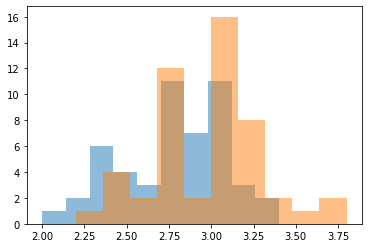

DescribeResult(nobs=50, minmax=(2.0, 3.4), mean=2.7700000000000005, variance=0.09846938775510206, skewness=-0.3518674965401782, kurtosis=-0.44827189991677496)
DescribeResult(nobs=50, minmax=(2.2, 3.8), mean=2.974, variance=0.10400408163265305, skewness=0.35487781319939127, kurtosis=0.5197659354955646)


In [27]:
versicolor = iris[iris['species'] == 'Iris-versicolor']

virginica = iris[iris['species'] == 'Iris-virginica']


plt.hist(versicolor['sepal_width'], alpha = .5)
plt.hist(virginica['sepal_width'], alpha = .5)
plt.show()

print(stats.describe(versicolor['sepal_width']))
print(stats.describe(virginica['sepal_width']))


The distributions don't look perfectly bell-shaped, but remember that we are dealing with very small sample sizes, so the histogram is going to be sparse. Skewness and kurtosis seem to check out for normality. 

Let's conduct one more normality check: Shapiro-Wilk. We can use [`shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) from `scipy.stats`.

In [5]:
print(stats.shapiro(versicolor['sepal_width']))
print(stats.shapiro(virginica['sepal_width']))

(0.9741330742835999, 0.33798879384994507)
(0.9673910140991211, 0.1809043288230896)


Each p-value is greater than .05 and W is close to 1. Great! It appears each are normally distributed.

## Comparing multiple normally distributed groups

We could continue this analysis by conducting a t-test, but you're already a pro at that. Instead, let's bring in the third Iris species and compare them all at once. 

A handy way to list the unique values in a DataFrame column is the `unique()` method:

In [6]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

`Iris-setosa` is our third category, so let's create a `setosa` DataFrame for ease of analysis, print the descriptive and inferential statistics for normality, and add it to our plot:

DescribeResult(nobs=50, minmax=(2.3, 4.4), mean=3.418, variance=0.1451795918367347, skewness=0.1038140820747848, kurtosis=0.6851340609499261)
(0.968691885471344, 0.20465604960918427)


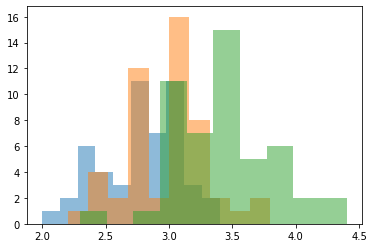

In [7]:
setosa = iris[iris['species'] == 'Iris-setosa']

print(stats.describe(setosa['sepal_width']))
print(stats.shapiro(setosa['sepal_width']))


plt.hist(versicolor['sepal_width'], alpha = .5)
plt.hist(virginica['sepal_width'], alpha = .5)
plt.hist(setosa['sepal_width'], alpha = .5)
plt.show()



Great! Each species is normally distributed. However, our overlapping histograms are getting hard to read. We can create a series of histograms for each category by adding the `by` argument to `hist()`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198C2646388>,
      dtype=object)

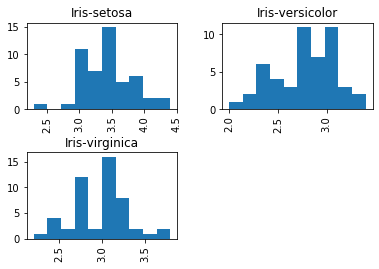

In [8]:
iris['sepal_width'].hist(by = iris['species'])

Another option for comparing the frequencies of multiple groups simultaneously is with a boxplot: 

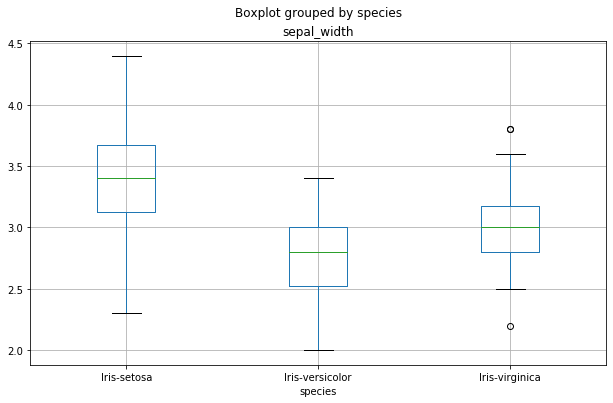

In [9]:
# Sepal width is normally distributed


#Create a boxplot
iris.boxplot('sepal_width', by='species', figsize=(10, 6))

## Comparing multiple groups

While none of the three distributions look very pretty on a histogram, they are sufficiently close to the normal distribution (given the small sample size) that the mean and standard deviation would give us useful information.  

We are now comparing three unrelated independent samples of data. The appropriate parametric choice is a one-way Analysis of Variance (ANOVA).  

## One-Way ANOVA

The one-way ANOVA's test statistic, called F, will identify whether any of the groups differs from the others.  

The F-test alone *cannot* say which group (or groups) are the different ones.

\begin{equation}
F=\frac{{n\sum(\bar{Y}_j-\bar{Y})^2}/{(a-1)}}{{\sum\sum(Y_{ij}-\bar{Y}_j)^2}/{(N-a)}}
\end{equation}

*n* is the number of datapoints in each group.  
$\bar{Y}_j$ is the mean for the *j*th group.  
$\bar{Y}$ is the overall mean.  
$Y_{ij}$ is the *i*th value of *j*th group.  
*a* is the number of groups.  
*N* is the total number of datapoints.  

The logic of the one-way ANOVA is to compare the variance between group means $\bar{Y}_j$ and the overall mean $\bar{Y}$ with the variance between observations within each group $Y_{ij}$ and the mean of that group $\bar{Y}_j$.  This ratio is known as the F score. 

The F score is used to calculate the probability of getting a difference that large in the sample if there were no meaningful difference between the groups in the population. 

This is called a "one-way" ANOVA because we are analyzing the difference in *one* variable. If we were analyzing differences in more than one variable, we would use another test.

We can conduct a one-way ANOVA using [`f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) from `scipy.stats`.

In [10]:
stats.f_oneway(setosa['sepal_width'], versicolor['sepal_width'], virginica['sepal_width'])

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

Like `ttest_ind()`, `f_oneway()` returns a test statistic, or F-value, and a p-value. We can compare the p-value against our desired alpha (usually .05) to determine statistical significance.  It appears that the three species are likely to differ in the population (p < .0001). 

But which group is the odd one out? 

Returning to the charts above, visual inspection suggests that the setosa species has a wider sepal width than versicolor or virginica. To formally test this, we can perform a set of pairwise t-tests comparing each group.



In [11]:
print(stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width']))
print(stats.ttest_ind(setosa['sepal_width'], virginica['sepal_width']))
print(stats.ttest_ind(versicolor['sepal_width'], virginica['sepal_width']))

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)
Ttest_indResult(statistic=6.289384996672061, pvalue=8.916634067006443e-09)
Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)


## Multiple Testing Correction: Tukey's Honest Significant Differences (HSD) Test


Instead of running many pairs of t-tests to find out which species is the odd one out, we could run a Tukey's HSD test.  Unlike a t-test, Tukey's HSD test does pairwise tests that use a variability estimate based on variability from all the groups combined (the denominator from the F-test above) rather than variability from only the two groups being tested.  

\begin{equation}
Q=\frac{M_i-M_j}{\sqrt{MSE/n}}
\end{equation}

Where $MSE ={\sum\sum(Y_{ij}-\bar{Y}_j)^2}/{(N-a)}$ from the denominator of the F-test above (Mean Squared Error). $MSE$ is known as the *mean square error*.

In addition, when calculating the probability of getting this ratio, the test statistic, *Q* will be evaluated in light of a modified probability distribution that takes into account the number of means being tested across all pairwise tests.

Running Tukey's HSD using Python's `statsmodels` package will get us a table with the differences between each pair of means, the upper and lower bounds of that difference estimate, and whether we should reject the null hypothesis that each pair of groups is not different.  

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = iris['sepal_width'],      # Data
                          groups = iris['species'],   # Groups
                          alpha=0.05)         # Significance level


In [13]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


## Multiple groups and Type I error

You may be wondering why we went through all this trouble when we could have just done a bunch of t-tests comparing the groups. The reason for doing an ANOVA first, and following-up with post-hoc tests if the F-test suggests differences, is to prevent false positive results, or Type I errors.

As you've read several times by now, data scientists often use a probability threshold of 5% (p = .05) to determine whether groups we are comparing in our sample are meaningfully different in the population (though the use of this threshold, or even the existence of a threshold at all, is widely debated). One way of interpreting that threshold is that if there were no real difference between the groups in the population, we would see differences like those in our sample less than 5% of the time. To put it another way, this threshold means we have a 1 in 20 chance of a false positive, of claiming there is a real difference when in fact, there is not.

This 1 in 20 chance, however, only holds when we have done exactly one statistical test on the data. If we perform two statistical tests on the same data, the chances of getting a false positive on at least one of them are now 1 in 10: (1/20 + 1/20). If we were to perform 200 tests on the same data, it is likely that up to 10 of our tests are false positives.

As data scientists, we want to be confident that our conclusions accurately reflect the population. There are various multiple test correction methods that can be used to keep chances of a false positive below the 5% threshold. One is Tukey's HSD test, which uses information about the overall sample variance and the number of groups being compared to "raise the bar" on how large a group difference must be before it passes the 5% probability threshold.

There are many methods, some specific to certain types of analysis and others representing more general approaches suitable for many different statistical goals. [This article in Nature Biotechnology](https://www.nature.com/articles/nbt1209-1135) has a good review of decision-points involved in selecting a correctional approach.

## Paired t-tests for dependent groups 

So far, we have assumed that the groups we are comparing are made up of different people. Sometimes, however, we want to compare people to themselves, to see if changing an element (the color of a website, the text of an email, etc) changes peoples' reactions. This type of data leads to *dependent groups*, because if we know a person's response to condition A, we already have some information about how they might respond to condition B. As a result, different statistical methods are needed if we want to compare condition A to condition B.

A paired t-test is used to compare two dependent (or "paired") groups. The difference score is calculated by subtracting each pair of scores and then calculating the mean difference, rather than calculating the difference of the means. 

In a paired t-test, if a person is missing data at either of the two time points, *their condition is discarded*. 

To demonstrate, let's read in a dataset recording blood pressures for 120 patients taken before and after an intervention. 



In [14]:
bp = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv")
bp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


Our null hypothesis for the paired t-test is that the mean difference between time points is equal to zero. 

The paired t-test assumes normality -- this time, on the *differences* between the two timepoints, not the raw values themselves. 

DescribeResult(nobs=120, minmax=(-41, 45), mean=5.091666666666667, variance=279.34446778711487, skewness=-0.06267900990911217, kurtosis=-0.12080508546952107)


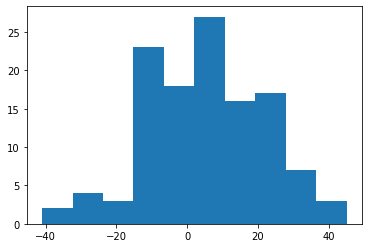

In [15]:
bp['bp_difference'] = bp['bp_before'] - bp['bp_after']

plt.hist(bp['bp_difference'])

print(stats.describe(bp['bp_difference']))

Normality is assumed, so to test this difference we will use [`ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) from `scipy.stats`. 

In [16]:
stats.ttest_rel(bp['bp_before'], bp['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

Going by the p-value, the findings are significant. The difference in means is significantly different than zero.

# Nonparametric tests

If a visual inspection of the data (potentially in combination with the Shapiro-Wilk test) show that the data is meaningfully non-normal, then any statistics that assume normality will give results that are biased or just straight-up wrong.  

Fortunately, there are nonparametric versions of all common statistical methods.  Nonparametric methods are less powerful (given the same sample size, a parametric test will be able to detect smaller trends in the data), which is why they are not used all the time.  

Generally speaking, a nonparametric test works by first converting variable values into rankings, from the lowest value (1st place) to the highest value (last place).  Here is an example of a “height in inches” variable in its original scale, and when converted into ranks:

|Height|Height|
|---|---|
|Inches		|Ranks|
|	60	|	4|
|	57	|	3|
|	72	|	7|
|	55	|	2|
|	51	|	1|
|	66	|	5|
|	69	|	6|

Once the variable values are converted into ranks, statistical tests are performed on the ranks. 


For an example, let's compare the distributions by species for the `petal_width` variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198C2B4DE48>,
      dtype=object)

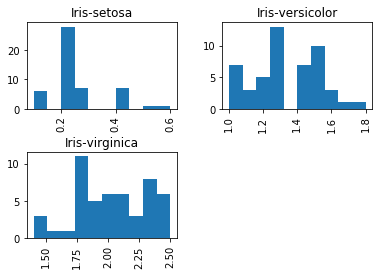

In [17]:
iris['petal_width'].hist(by = iris['species'])

Simply by looking at the visualizations, this variable does not appear normally distributed. We will need to conduct a non-parametric test. 

### Kruskal-Wallis Test

The Kruskal-Wallis test is used for two or more groups.  While this test is a bit complicated, the underlying logic is the same as the one-way ANOVA we covered earlier.  First, we compute an estimate of the size of the differences between the groups, then we put that difference into context by dividing it by the amount of variance in the groups.

\begin{equation}
H=(N-1)\frac{\sum_{i=1}^gn_i(\bar{r}_i-\bar{r})^2}{\sum_{i=1}^g\sum_{j=1}^{n_i}(r_{ij}-\bar{r})^2}
\end{equation}

*H* is the test statistic.  
$n_i$ is the number of datapoints in group *i*.   
$r_{ij}$ is the rank of datapoint *j* in group *i* when ranked among all datapoints in all groups.  
*N* is the total number of datapoints.  
$\bar{r}_i$ is the average rank of all datapoints in group *i*.  
$\bar{r}$ is the average of all the ranks, and can be calculated as $\frac12(N+1)$.  


This test works by first converting all the data into ranks from 1 (highest value) to N (lowest).  Then the overall average rank $\bar{r}$ is subtracted from the average rank for each group $\bar{r}_i$.  For each group, the difference is squared, then multiplied by the size of the group $n_i$ .  Finally, the scaled squared differences are summed to create the numerator.  This provides information on how different the mean ranks for each group are from one another.

Then, for each observation within a group, the average overall rank $\bar{r}$ is subtracted from the rank of each observation $r_{ij}$ .  This difference is squared and summed.  Finally, the group-level sums are added together to create the denominator.  This tells us how much variability there is within each group, which is then pooled to create an estimate of the variance of the sample.

The test statistic *H* represents the ratio of the divergence of each group mean rank from the overall mean rank relative to the variance in ranks within each group, multiplied by the size of the sample *N*-1.  The larger the value of H, the more likely it is that one of the groups differs meaningfully from the others in the population. The test does not indicate which samples are larger or by how much.

We will conduct this test using [`kruskal()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) from `scipy.stats`.


In [18]:
stats.kruskal(setosa['petal_width'], virginica['petal_width'],versicolor['petal_width'])

KruskalResult(statistic=131.09335318823713, pvalue=3.415387999117524e-29)

Based on the p-value, we can reject the null that all variables have the same distribution.

### Wilcoxon signed-rank test

This is a dependent or paired test for samples that are not normally distributed.

As the name implies, the Wilcoxon uses ranked values to test whether the difference in pairs follows a symmetric distribution around zero. More succintly, our null is that the median difference between pairs of observations is zero.

Let's try on a sample of cortisol readings in the morning and the evening. Source:[ StatsGuru](https://statsguru.bham.ac.uk/downloads). 

In [19]:
cortisol = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/wilcoxon-matched-pairs-data.csv")
cortisol.head()


,cortisol_morning,cortisol_evening
0,33.26,12.44
1,7.37,2.55
2,18.83,6.34
3,62.70,34.89
4,7.10,3.55


We can confirm visually these are not normally distributed: 

(array([9., 2., 4., 1., 0., 2., 0., 0., 0., 2.]),
 array([ 1.21 ,  4.578,  7.946, 11.314, 14.682, 18.05 , 21.418, 24.786,
        28.154, 31.522, 34.89 ]),
 <a list of 10 Patch objects>)

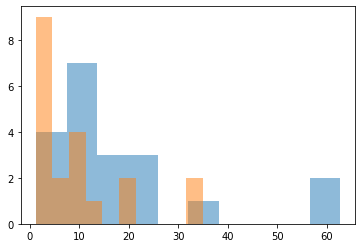

In [20]:
plt.hist(cortisol['cortisol_morning'], alpha = .5)
plt.hist(cortisol['cortisol_evening'], alpha = .5)


Let's run the rest with [`wilcoxon()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) from `scipy.stats`.

In [21]:
stats.wilcoxon((cortisol['cortisol_morning']-cortisol['cortisol_evening']))

WilcoxonResult(statistic=13.0, pvalue=0.0005934167947217433)

The median difference between pairs of observations is significantly different from zero.

## Overview

This checkpoint served as an introduction to comparing groups when the assumptions of a t-test are not met. 

Here is a recap of when to use what test:

<table border="1">
<tr>
<th>Experiment Type</th>
<th colspan="2">Normally Distributed</th>
<th colspan="2">Non-Normally Distributed</th>
</tr>
<tr>
<th></th>
<th>Test</th>
<th>Function</th>
<th>Test</th>
<th>Function</th>
</tr>
<tr>
<td>A/B test, two independent groups</td>
<td>t-test for independent samples</td>
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind"><code>scipy.stats.ttest_ind()</code></a></td>
<td>Mann-Whitney U test<br>
Moon's Median Test<br>
Kruskal-Wallis Test</td>

 <td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu"><code>scipy.stats.mannwhitneyu()</code></a><br><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test"><code>scipy.stats.median_test()</code></a>
<br><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal"><code>scipy.stats.kruskal()</code></a>
</td>
</tr>
  
<tr>
<td>A/B/C/… test, three or more independent groups</td>
<td>One-way ANOVA</td>
  
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway"><code>scipy.stats.f_oneway()</code></a></td>
<td>Mood’s median test<br>
Kruskal-Wallis test<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test"><code>scipy.stats.median_test()</code></a>
<br><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal"><code>scipy.stats.kruskal()</code></a>
</td>


</tr>
<tr>
<td>A/B test where all participants experience both versions</td>
<td>t-test for paired samples</td>
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel"><code>scipy.stats.ttest_rel()</code></a></td>
<td>Wilcoxon signed-rank test</td>
<td><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon"><code>scipy.stats.wilcoxon()</code></a></td>
</tr>
</table>

